### The temporal network class

In this notebook we explore how to load the coherence connectivity data with the temporal network class

In [2]:
# Path to the toolbox
import sys; sys.path.insert(1, '/home/vinicius/storage1/projects/GrayData-Analysis')
import os
import xarray as xr
import pandas as pd
import numpy  as np
# GDa
from   GDa.temporal_network import temporal_network
import matplotlib.pyplot as plt 

### Instantiate temporal network

In [4]:
net = temporal_network(coh_file='coh_k_0.3_morlet.nc', coh_sig_file='coh_k_0.3_morlet_surr.nc', 
                 date='141017', trial_type=[1], behavioral_response=[1])

In [5]:
net.convert_to_adjacency()

In [8]:
out = net.super_tensor.groupby("roi").mean("roi")#.interp({"freqs":np.linspace(3,75,20)}, "quadratic")

No handles with labels found to put in legend.


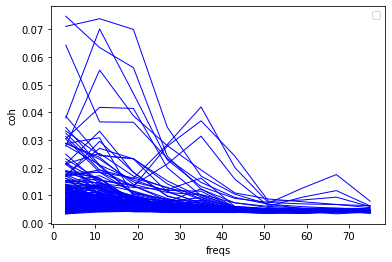

In [9]:
out.mean(dim=("times","trials")).plot(x="freqs", hue="roi", color="b", lw=1);
plt.legend()

In [14]:
import umap

In [ ]:
m=umap.UMAP(n_neighbors=5, min_dist=1e-3, n_jobs=10).fit_transform(out.stack(z=("trials","times","freqs")).values.T)

In [ ]:
umap.UMAP?

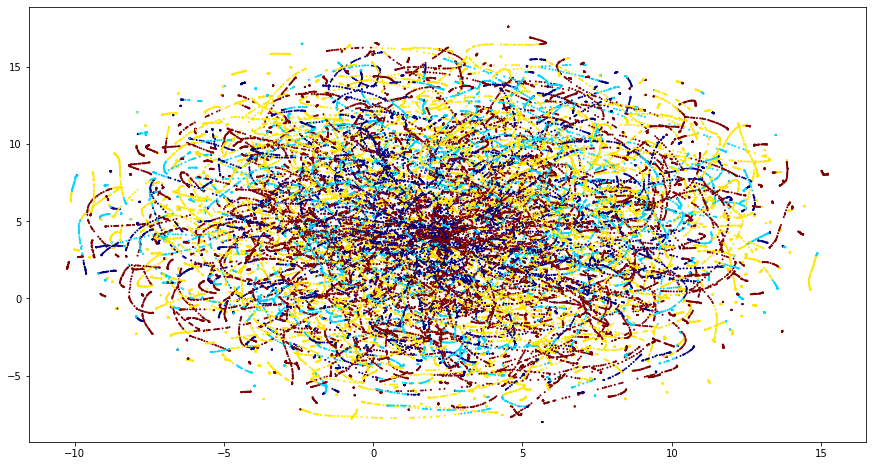

In [73]:
plt.figure(figsize=(15,8))
plt.scatter(m[:,0], m[:,1], s=1, c=np.repeate(range(10), ), cmap="jet")

In [63]:
net.create_stage_masks()

In [65]:
for i,k in enumerate(net.s_mask.keys()):
    net.s_mask[k] = net.s_mask[k]*(i+1)

In [67]:
for i,k in enumerate(net.s_mask.keys()):
    if k is not "baseline":
        net.s_mask["baseline"] +=  net.s_mask[k]

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-67-30e97efb5b96>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if k is not "baseline":
